In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.shape

(148, 7)

In [7]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no NULL value in dataframe

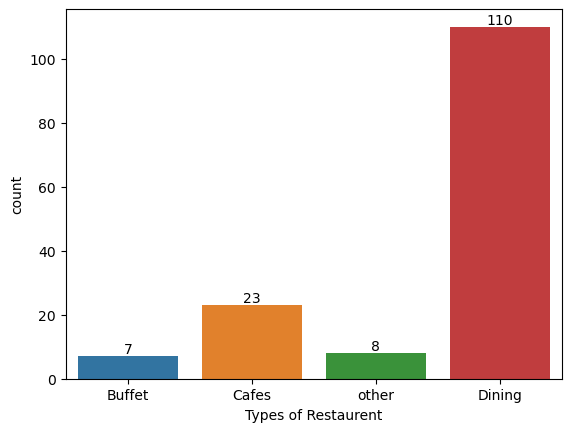

In [17]:
num=sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of Restaurent');
for bar in num.containers:
    num.bar_label(bar)

Majority of restaurants fall into the dining category.
The total nuber of Dining restaurant is 110.

Text(0, 0.5, 'votes')

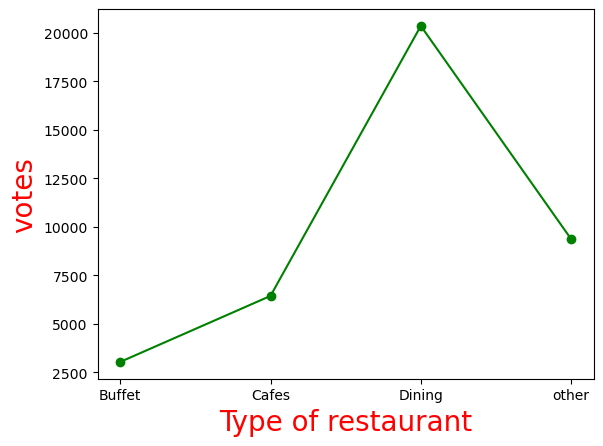

In [15]:
grouped_D=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_D})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("votes", c='red',size=20)

Dining restaurant are preferred by the larger number of votes and 
Buffet restaurant are preferred by the small number of votes.

In [18]:
max_vote=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes'] == max_vote, 'name']

print("Restaurant with the maximum votes:")
restaurant_with_max_votes

Restaurant with the maximum votes:


38    Empire Restaurant
Name: name, dtype: object

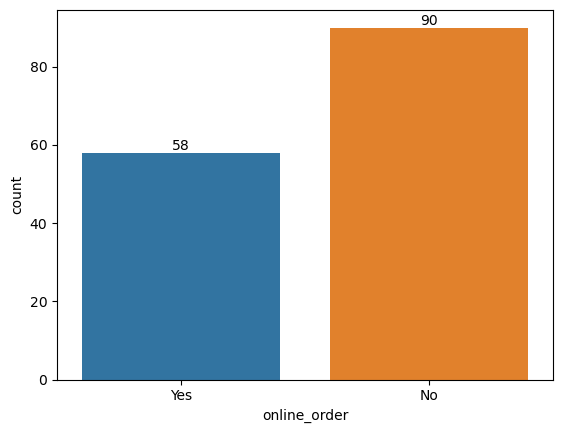

In [19]:
num=sns.countplot(x=df['online_order'])
for i in num.containers:
    num.bar_label(i)

This plot representing the majority of restaurants do not accept online order.

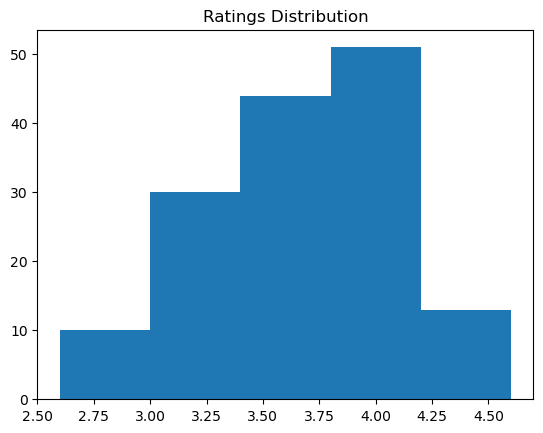

In [20]:
# let's explore the rate column.
plt.hist(df.rate, bins=5)
plt.title("Ratings Distribution")
plt.show()

The majority of restaurants received ratings raging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

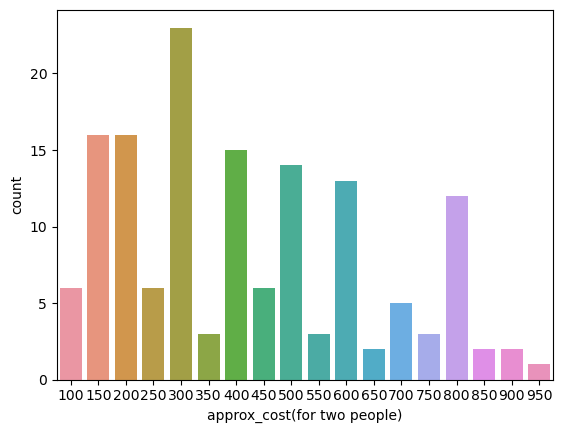

In [21]:
#Let's explore the approx_cost(for two people) column.
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Mostly couples prefer restaurant with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

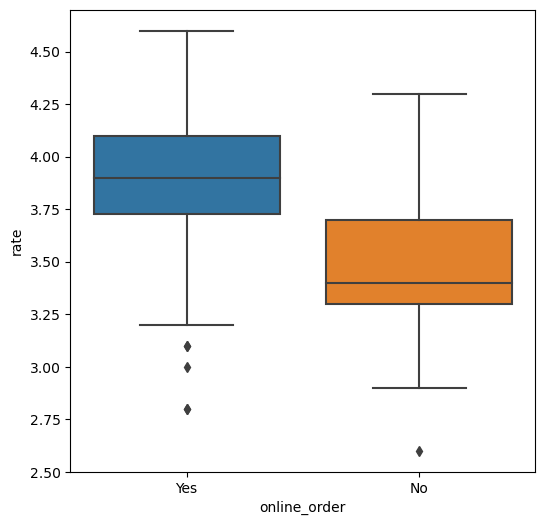

In [23]:
#Examine whether online order receive higher ratings then offline orders.
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y= 'rate', data=df)

Offline orders received lower ratings than online orders.

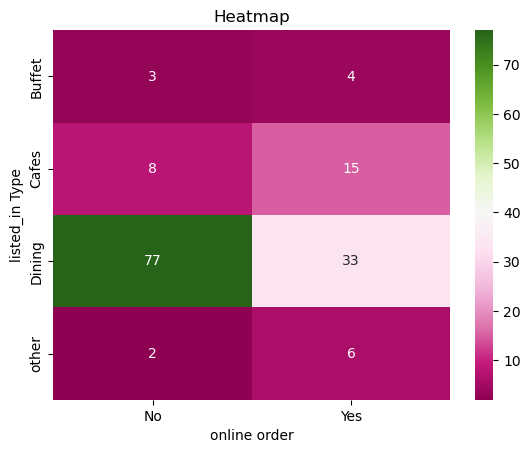

In [30]:
p_table=df.pivot_table(index='listed_in(type)', columns='online_order', fill_value=0, aggfunc='size')
sns.heatmap(p_table, annot=True, cmap="PiYG", fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("listed_in Type")
plt.show()